In [43]:
!pip install gradio

In [44]:
!pip install -Uqq fastai nbdev

In [70]:
from fastai.vision.all import *
from fastai.vision.all import load_learner
import nbdev
import os
import gradio as gr

In [71]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [72]:
import pathlib
temp = pathlib.WindowsPath
pathlib.WindowsPath = pathlib.PosixPath

In [73]:
#export

model_dir = "/content/drive/MyDrive/Learnings/fai/models/parrot-recognizer-v3.pkl"

model = load_learner(model_dir)

# model = load_data(model_dir, "parrot-recognizer-v2.pkl")

In [74]:
parrot_species = ['african grey parrot',
 'australian king parrot',
 'blue lorikeet',
 'blue-and-yellow macaw',
 'blue-headed parrot',
 'budgerigar',
 'burrowing parrot',
 'caique parrot',
 'catalina macaw',
 'chestnut-fronted macaw',
 'cockatiels',
 'crimson rosella',
 'cuban amazon',
 'eclectus parrot',
 'galah',
 'golden parakeet',
 'great green macaw',
 'great hanging parrot',
 'greater vasa parrot',
 'hahn_s macaws',
 'hooded parrot',
 'hyacinth macaw',
 'kea',
 'kākāpō',
 'lovebirds',
 'monk parakeet',
 'orange-winged amazon',
 'palm cockatoo',
 'parrotlet',
 'plum-headed parakeet',
 'puerto rican amazon',
 'rainbow lorikeet',
 'red-breasted parakeet',
 'red-crowned amazon',
 'red-crowned parakeet',
 'red-fan parrot',
 'red-shouldered macaw',
 'red-tailed black cockatoos',
 'rose-ringed parakeet',
 'saint vincent amazon',
 'scarlet macaw',
 'senegal parrot',
 'spixs macaw',
 'sun conure',
 'thick-billed parrot',
 'turquoise-fronted amazon',
 'vernal hanging parrot',
 'white cockatoo',
 'yellow-collared macaws',
 'yellow-headed amazon']

In [75]:
def recognize_image(image):
  pred, idx, probs = model.predict(image)
  return dict(zip(parrot_species, map(float, probs)))

In [76]:
im =  "/content/drive/MyDrive/Learnings/fai/test_images/unknown_12.jpg"

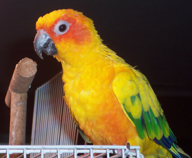

In [77]:
img = PILImage.create(im)
img.thumbnail((192,192))
img

In [78]:
recognize_image(img)

{'african grey parrot': 2.4238900664386165e-07,
 'australian king parrot': 2.8742283220140052e-08,
 'blue lorikeet': 1.3817527566573062e-08,
 'blue-and-yellow macaw': 1.4523610047945112e-07,
 'blue-headed parrot': 2.2318381809327548e-07,
 'budgerigar': 2.966168892726273e-07,
 'burrowing parrot': 4.3425492890492023e-07,
 'caique parrot': 0.00015266092668753117,
 'catalina macaw': 3.27485213347245e-06,
 'chestnut-fronted macaw': 7.606906393675672e-08,
 'cockatiels': 1.5174572709497625e-08,
 'crimson rosella': 8.174133085958601e-07,
 'cuban amazon': 5.975822148229781e-08,
 'eclectus parrot': 1.4897563005433767e-07,
 'galah': 2.116636643734182e-08,
 'golden parakeet': 0.0009243344538845122,
 'great green macaw': 2.0022264379804255e-06,
 'great hanging parrot': 9.968088932055252e-08,
 'greater vasa parrot': 1.4778147772176453e-07,
 'hahn_s macaws': 1.1656283049887861e-06,
 'hooded parrot': 1.1677640543439338e-07,
 'hyacinth macaw': 4.0817219826294604e-08,
 'kea': 2.0988004223454482e-07,
 'k

In [79]:
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()

examples = [
    "/content/drive/MyDrive/Learnings/fai/test_images/unknown_00.jpg",
    "/content/drive/MyDrive/Learnings/fai/test_images/unknown_01.jpg",
    "/content/drive/MyDrive/Learnings/fai/test_images/unknown_02.jpg",
    "/content/drive/MyDrive/Learnings/fai/test_images/unknown_03.jpg",
    "/content/drive/MyDrive/Learnings/fai/test_images/unknown_04.jpg",
    "/content/drive/MyDrive/Learnings/fai/test_images/unknown_05.jpg",
    "/content/drive/MyDrive/Learnings/fai/test_images/unknown_06.jpg",
    "/content/drive/MyDrive/Learnings/fai/test_images/unknown_07.jpg",
    "/content/drive/MyDrive/Learnings/fai/test_images/unknown_08.jpg",
    "/content/drive/MyDrive/Learnings/fai/test_images/unknown_09.jpg",
    "/content/drive/MyDrive/Learnings/fai/test_images/unknown_10.jpg",
    "/content/drive/MyDrive/Learnings/fai/test_images/unknown_11.jpg",
    "/content/drive/MyDrive/Learnings/fai/test_images/unknown_12.jpg",
    "/content/drive/MyDrive/Learnings/fai/test_images/unknown_13.jpg",
    "/content/drive/MyDrive/Learnings/fai/test_images/unknown_14.jpg",
    ]

iface = gr.Interface(fn=recognize_image, inputs=image, outputs=label, examples=examples)
iface.launch(inline=False, share = True)

<ipython-input-79-bcdea7a1344f>:1: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  image = gr.inputs.Image(shape=(192,192))
<ipython-input-79-bcdea7a1344f>:1: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  image = gr.inputs.Image(shape=(192,192))
<ipython-input-79-bcdea7a1344f>:2: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  label = gr.outputs.Label()
<ipython-input-79-bcdea7a1344f>:2: GradioUnusedKwargWarning: You have unused kwarg parameters in Label, please remove them: {'type': 'auto'}
  label = gr.outputs.Label()


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://22a71f6f04c0fe0a1c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# Notebook to Python Script Export

In [84]:
from nbdev.export import nb_export

In [ ]:
nb_export('app.py')